##Importing Libraries

In [104]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder 
from sklearn.cluster import KMeans , AgglomerativeClustering
%matplotlib inline


In [105]:
df = pd.read_csv('Mall_Customers.csv')

##Data preprocessing

In [106]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [107]:
df.shape

(200, 5)

In [108]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [110]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [111]:
lr = LabelEncoder()

In [112]:
df['Gender'] = lr.fit_transform(df['Gender'])

In [113]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int32
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 7.2 KB


In [115]:
df.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


In [116]:
new_df = df.drop('CustomerID',axis=1)

In [117]:
new_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [118]:
X1 = new_df[['Annual Income (k$)','Spending Score (1-100)']]
X2 = new_df[['Age','Spending Score (1-100)']]

##Data visualization

Text(0.5, 1.0, 'Income vs Spendig Score')

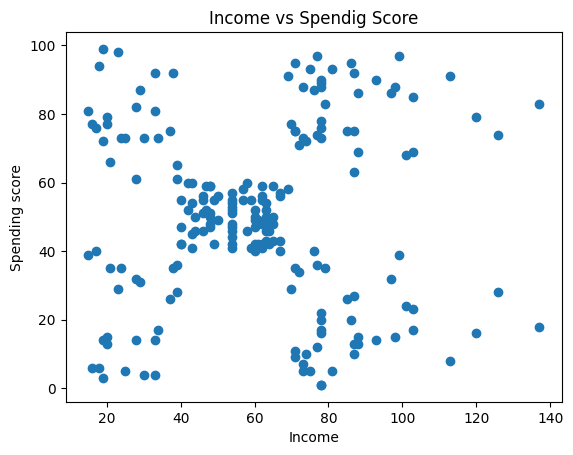

In [119]:


plt.scatter(X1['Annual Income (k$)'],X1['Spending Score (1-100)'])
plt.xlabel('Income')
plt.ylabel('Spending score')
plt.legend
plt.title("Income vs Spendig Score")

Text(0.5, 1.0, 'Age vs Spendig Score')

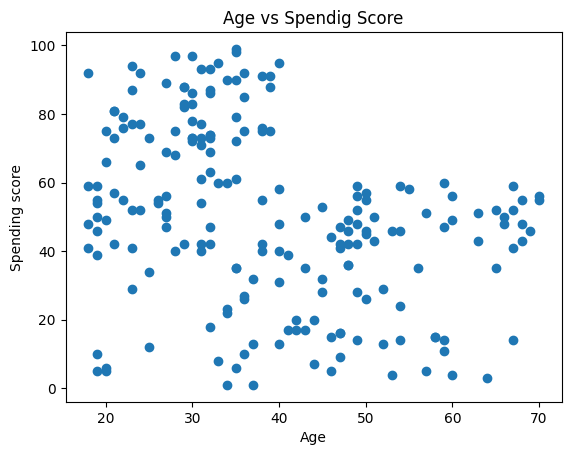

In [120]:

plt.scatter(X2['Age'],X1['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.legend
plt.title("Age vs Spendig Score")

#finding the suitable value of k for clusters by elbow method

In [121]:
# First take randomly the value of k (k=3)
km = KMeans(n_clusters=3)

In [122]:
km.fit_predict(X1)

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [123]:
#this is Sum Squared Error (SSE)
#If we increase the no.of clusters SSE might decrease that's how we decide the suitable value of k

km.inertia_ 
            

106348.37306211119

In [124]:
#check the value of SSE for for k 1 to 15 and choose the k with least SSE
SSE = []
for k in range(1,15):
    km = KMeans(n_clusters=k)
    km.fit_predict(X1)
    SSE.append(km.inertia_)
    

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


([<matplotlib.axis.XTick at 0x225a14ad5d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14')])

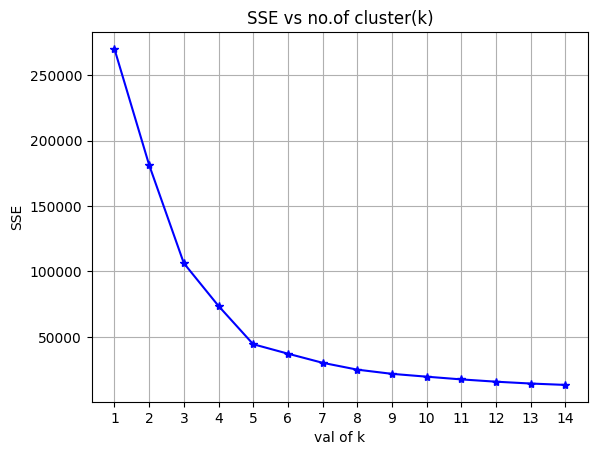

In [125]:
plt.plot(range(1,15),SSE , marker='*',color='blue')
plt.title("SSE vs no.of cluster(k)")
plt.xlabel('val of k')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,15))

#Kmeans Clustering

In [126]:
# As we can see that k=5,6 are more suitable 
# we will consider k=5 
km = KMeans(n_clusters=5,random_state=1)

labels = km.fit_predict(X1)

cent = km.cluster_centers_

print(f"datapoint's cluster after prediction: {labels} \n")
print(f"the SSE: {km.inertia_} \n")
print(f"Cluster centers(centriod): {cent} \n")


datapoint's cluster after prediction: [4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 2 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 2 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3] 

the SSE: 44448.45544793371 

Cluster centers(centriod): [[25.72727273 79.36363636]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]] 



C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


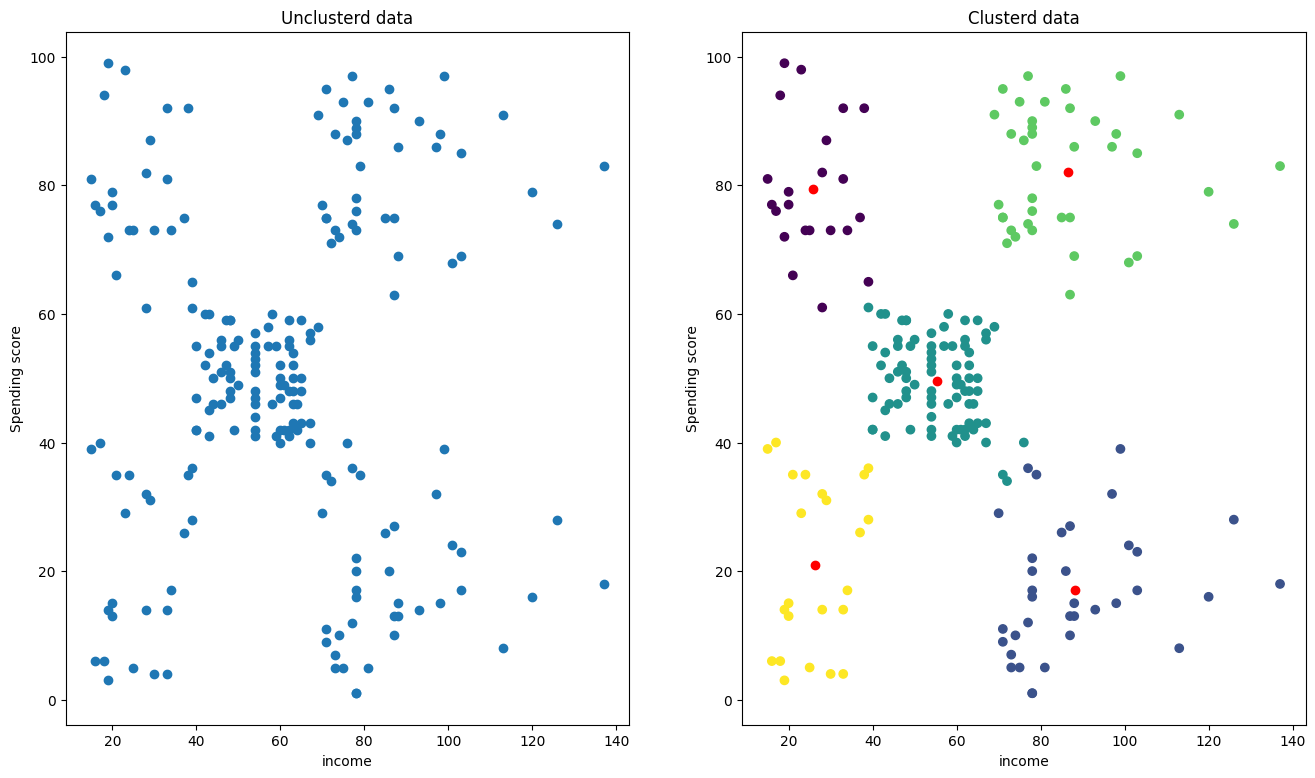

In [127]:
plt.figure(figsize=(16,9))

plt.subplot(1,2,1)
plt.scatter(X1['Annual Income (k$)'],X1['Spending Score (1-100)'])
plt.xlabel("income")
plt.ylabel("Spending score")
plt.title("Unclusterd data")

plt.subplot(1,2,2)
plt.scatter(X1['Annual Income (k$)'],X1['Spending Score (1-100)'],c=labels)#c=labels means different color for different cluster
plt.xlabel("income")
plt.ylabel("Spending score")
plt.title("Clusterd data")

plt.scatter(cent[:,0],cent[:,1],color = "red")

In [128]:
#predicting the datapoint's cluster no.
km.predict([[44,60]])

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2])

In [129]:
#check the value of SSE for for k 1 to 15 and choose the k with least SSE
SSE = []
for k in range(1,15):
    km = KMeans(n_clusters=k)
    km.fit_predict(X2)
    SSE.append(km.inertia_)

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

([<matplotlib.axis.XTick at 0x225a24e24d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14')])

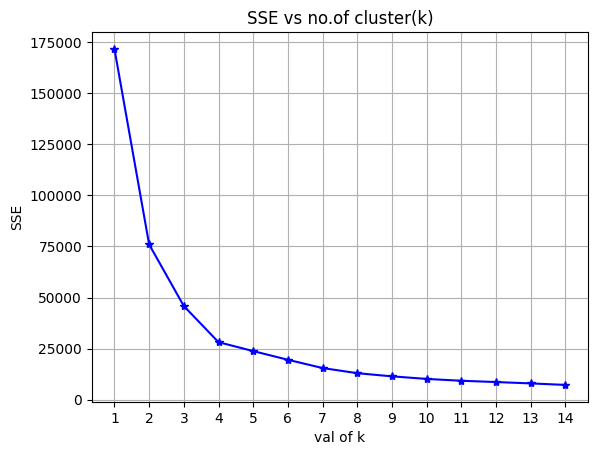

In [130]:
plt.plot(range(1,15),SSE , marker='*',color='blue')
plt.title("SSE vs no.of cluster(k)")
plt.xlabel('val of k')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,15))

In [131]:
#suitable value of k = 5

km = KMeans(n_clusters=5,random_state=0)

labels = km.fit_predict(X2)

cent = km.cluster_centers_

print(f"datapoint's cluster after prediction: {labels} \n")
print(f"the SSE: {km.inertia_} \n")
print(f"Cluster centers(centriod): {cent} \n")

datapoint's cluster after prediction: [0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 4 0 4 1 4 1 3 1 3 1 4 0 4 1 3 1 3 1 3 1 3
 1 3 1 2 1 4 0 4 0 2 0 0 0 2 0 0 2 4 4 2 2 0 2 2 0 2 2 2 0 4 2 0 0 2 4 2 2
 2 0 4 4 0 4 2 0 2 4 0 4 2 0 0 4 2 0 4 4 0 0 4 0 4 0 0 4 2 0 2 0 2 2 2 2 2
 0 4 0 0 0 2 2 4 2 0 4 0 1 0 1 4 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 4 1
 3 1 3 1 3 1 3 1 3 1 3 1 4 1 3 1 4 1 3 1 4 0 3 1 3 1 3 1 3 1 3 1 4 1 3 1 4
 1 3 1 3 1 3 1 3 1 3 1 4 1 3 1] 

the SSE: 23811.52352472089 

Cluster centers(centriod): [[25.775      50.775     ]
 [30.1754386  82.35087719]
 [60.36666667 51.16666667]
 [43.1        12.2       ]
 [44.96969697 39.15151515]] 



C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


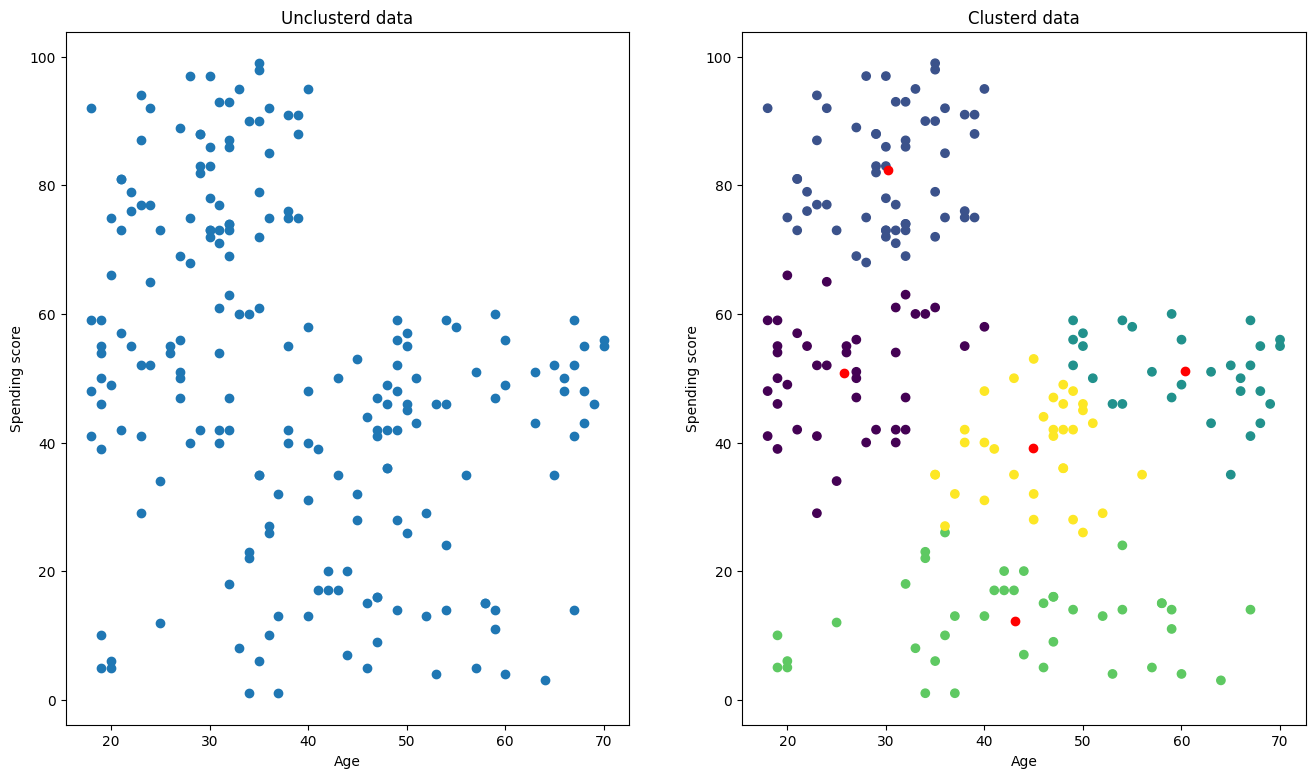

In [132]:
plt.figure(figsize=(16,9))

plt.subplot(1,2,1)
plt.scatter(X2['Age'],X2['Spending Score (1-100)'])
plt.xlabel("Age")
plt.ylabel("Spending score")
plt.title("Unclusterd data")

plt.subplot(1,2,2)
plt.scatter(X2['Age'],X2['Spending Score (1-100)'],c=labels) #c=labels means different color for different cluster
plt.xlabel("Age")
plt.ylabel("Spending score")
plt.title("Clusterd data")

plt.scatter(cent[:,0],cent[:,1],color = "red")

In [133]:
#predicting the datapoint's cluster no.
km.predict([[40,20]])

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3])

##Agglomerative Clustering

In [134]:
ag = AgglomerativeClustering(n_clusters=5)

In [135]:
# As we already decided tha value of k = 5
ag_labels = ag.fit_predict(X1)
print(ag_labels)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Text(0.5, 1.0, 'Aggolomerative Clustering')

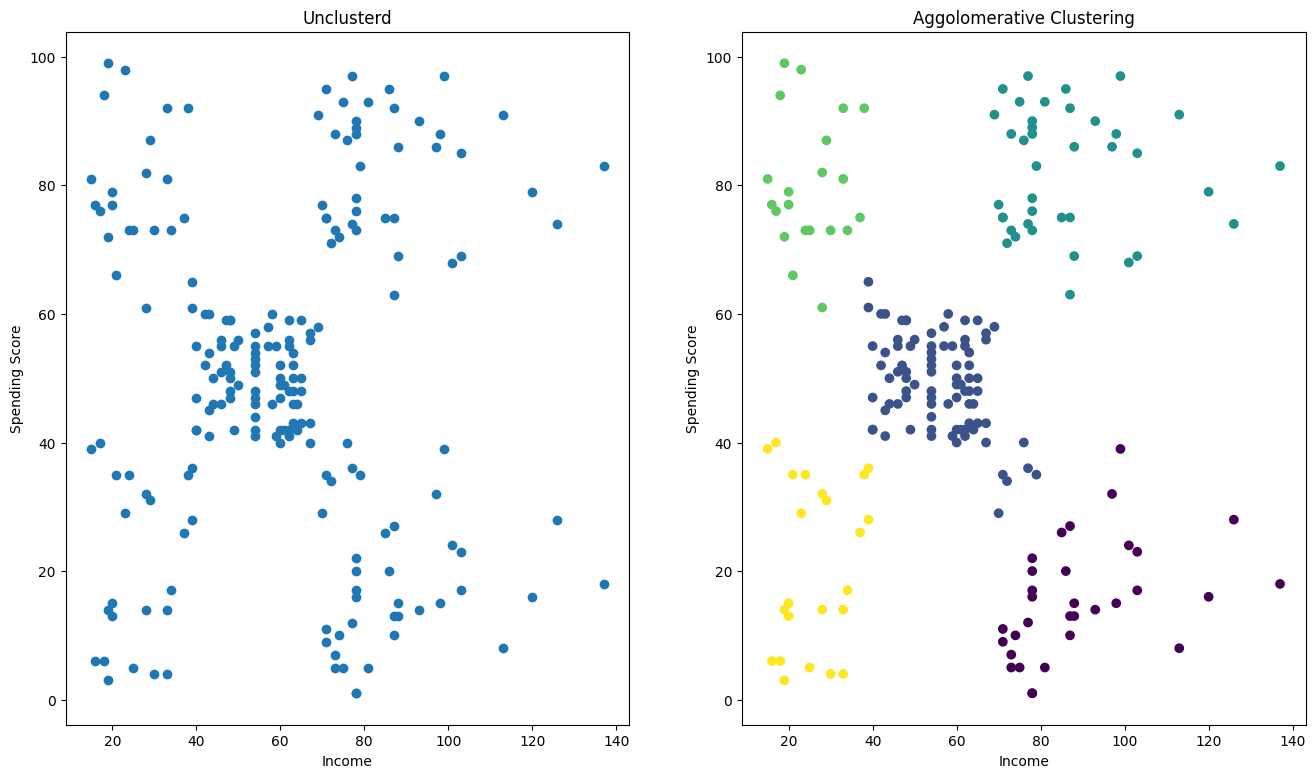

In [136]:
plt.figure(figsize=(16,9))

plt.subplot(1,2,1)
plt.scatter(X1['Annual Income (k$)'],X1['Spending Score (1-100)'])
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.title("Unclusterd")

#Agglomerative Clustering doesn't directly provide cluster "centroids" like K-Means does.
plt.subplot(1,2,2)
plt.scatter(X1['Annual Income (k$)'],X1['Spending Score (1-100)'],c=ag_labels)
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.title("Aggolomerative Clustering")

##Thank You